In [1]:
import quandl
import numpy as np
import pandas as pd

In [2]:
# How bitcoin works: https://www.youtube.com/watch?v=bBC-nXj3Ng4
quandl.ApiConfig.api_key = 'T3ox-1VP3bnyZ6h1dFpb'

In [3]:
# Market Price USD - Average USD market price across major bitcoin exchanges.
btc_market_price = quandl.get("BCHAIN/MKPRU")

In [4]:
# Bitcoin Market Capitalization - The total USD value of bitcoin supply in circulation, as calculated by the daily average market price across major exchanges.
btc_market_cap = quandl.get("BCHAIN/MKTCP")

In [5]:
# Total Bitcoins - The total number of bitcoins that have already been mined; in other words, the current supply of bitcoins on the network.
btc_supply = quandl.get("BCHAIN/TOTBC")

In [6]:
# Blockchain Size - The total size of all block headers and transactions. Not including database indexes.
btc_blockchain_size = quandl.get("BCHAIN/BLCHS")

In [7]:
# Bitcoin Number of Transactions - The number of daily confirmed Bitcoin transactions.
btc_transactions_number = quandl.get("BCHAIN/NTRAN")

In [8]:
# Bitcoin Estimated Transaction Volume - The total estimated value of transactions on the Bitcoin blockchain (does not include coins returned to sender as change).
btc_transaction_volume = quandl.get("BCHAIN/ETRAV")

In [9]:
# Bitcoin Number of Unique Bitcoin Addresses Used - The total number of unique addresses used on the Bitcoin blockchain.
btc_addresses_used = quandl.get("BCHAIN/NADDU")

In [10]:
# Hash rate - Number of combinations guesses per second 
# https://www.youtube.com/watch?v=GgaXmhTC_C0
btc_hash_rate = quandl.get("BCHAIN/HRATE")

In [11]:
# Mining difficulty - A relative measure of how difficult it is to find a new block.
# https://www.youtube.com/watch?v=o1gOyhU6XEw
btc_mining_difficulty = quandl.get("BCHAIN/DIFF")

In [12]:
# Miners Revenue - Total value of coinbase block rewards and transaction fees paid to miners.
# https://www.youtube.com/watch?v=o1gOyhU6XEw
btc_miners_revenue = quandl.get("BCHAIN/MIREV")

In [13]:
# Mining Operating Margin - Data showing miners revenue minus estimated electricity and bandwidth costs.
# btc_mining_operating_margin = quandl.get("BCHAIN/MIOPM")
# Only data to 2016...

In [14]:
# Bitcoin Cost Per Transaction - A chart showing miners revenue divided by the number of transactions.
btc_cost_per_transaction = quandl.get("BCHAIN/CPTRA")

In [15]:
# Bitcoin Total Transaction Fees USD - The total value of all transaction fees paid to miners (not including the coinbase value of block rewards).
btc_transaction_fees = quandl.get("BCHAIN/TRFUS")

In [16]:
# Bitcoin Average Block Size - The average block size in MB.
btc_avg_block_size = quandl.get("BCHAIN/AVBLS")

In [17]:
# Bitcoin Number of Transaction per Block - The average number of transactions per block.
btc_transactions_per_block = quandl.get("BCHAIN/NTRBL")

In [18]:
# Bitcoin Exchange Trade Volume - The total USD value of trading volume on major bitcoin exchanges
btc_transactions_per_block = quandl.get("BCHAIN/NTRBL")

In [19]:
btc_cost_per_transaction.values[:,0].shape

(4534,)

In [20]:
btc_data = pd.DataFrame(
    {
        "Market Price USD": btc_market_price.values[:-2,0],
        "Market Cap": btc_market_cap.values[:-1,0],
        "Bitcoin Supply": btc_supply.values[:-1,0],
        "Blockchain Size": btc_blockchain_size.values[:-1,0],
        "Daily Number of Transactions": btc_transactions_number.values[:-1,0],
        "Estimated Transaction Volume": btc_transaction_volume.values[:-1,0],
        "Unique Bitcoin Addresses Used": btc_addresses_used.values[:-1,0],
        "Hash rate": btc_hash_rate.values[:,0],
        "Mining difficulty": btc_mining_difficulty.values[:-1,0],
        "Miners Revenue": btc_miners_revenue.values[:-1,0],
        "Cost Per Transaction": btc_cost_per_transaction.values[:-1,0],
        "Total Transaction Fees USD": btc_transaction_fees.values[:-1,0],
        "Average Block Size": btc_avg_block_size.values[:-1,0],
        "Number of Transaction per Block": btc_transactions_per_block.values[:-1,0],
        "Exchange Trade Volume": btc_transactions_per_block.values[:-1,0],
    },
    index=list(btc_market_cap.index[:-1])
)

In [21]:
btc_data

,Market Price USD,Market Cap,Bitcoin Supply,Blockchain Size,Daily Number of Transactions,Estimated Transaction Volume,Unique Bitcoin Addresses Used,Hash rate,Mining difficulty,Miners Revenue,Cost Per Transaction,Total Transaction Fees USD,Average Block Size,Number of Transaction per Block,Exchange Trade Volume
2009-01-02,0.00,0.000000e+00,50.00,0.000000,1.0,0.000000,1.0,0.000000e+00,1.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000272,1.000000,1.000000
2009-01-03,0.00,0.000000e+00,50.00,0.000000,0.0,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,1.000000,1.000000
2009-01-04,0.00,0.000000e+00,50.00,0.000000,0.0,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,1.000000,1.000000
2009-01-05,0.00,0.000000e+00,50.00,0.000000,0.0,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,1.000000,1.000000
2009-01-06,0.00,0.000000e+00,50.00,0.000000,0.0,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-27,39266.04,7.333947e+11,18719793.75,347187.215018,214035.0,125733.418574,602300.0,1.481631e+08,2.504649e+13,3.087246e+07,144.240229,2.569471e+06,1.262394,1829.358974,1829.358974
2021-05-28,38445.29,6.696648e+11,18720625.00,347335.098219,218311.0,149454.961727,616432.0,1.444278e+08,2.504649e+13,2.989250e+07,136.926204,2.547163e+06,1.343872,1834.546218,1834.546218
2021-05-29,35689.62,6.305515e+11,18721281.25,347495.059559,198332.0,100953.137516,537305.0,1.518582e+08,2.504649e+13,2.723722e+07,137.331430,1.672654e+06,1.322726,1709.758621,1709.758621
2021-05-30,34647.67,6.719756e+11,18722156.25,347648.846394,179795.0,63227.168975,476088.0,1.475267e+08,2.121435e+13,3.323513e+07,184.850108,1.298426e+06,1.499183,1248.576389,1248.576389


In [22]:
btc_data.describe()

,Market Price USD,Market Cap,Bitcoin Supply,Blockchain Size,Daily Number of Transactions,Estimated Transaction Volume,Unique Bitcoin Addresses Used,Hash rate,Mining difficulty,Miners Revenue,Cost Per Transaction,Total Transaction Fees USD,Average Block Size,Number of Transaction per Block,Exchange Trade Volume
count,4533.000000,4.533000e+03,4.533000e+03,4533.000000,4533.000000,4.533000e+03,4.533000e+03,4.533000e+03,4.533000e+03,4.533000e+03,4533.000000,4.533000e+03,4533.000000,4533.000000,4533.000000
mean,4134.952927,7.437090e+10,1.224216e+07,88009.313574,142573.004853,1.718927e+05,2.752684e+05,2.384788e+07,3.283294e+12,6.316822e+06,26.920097,4.832996e+05,0.513765,959.858586,959.858586
std,9285.637184,1.728601e+11,5.656549e+06,105352.318650,127821.304442,2.177303e+05,2.559652e+05,4.413859e+07,6.103343e+12,1.094756e+07,37.359287,1.564197e+06,0.470158,872.073382,872.073382
min,0.000000,0.000000e+00,5.000000e+01,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,1.000000,1.000000
25%,6.591500,5.320965e+07,8.303600e+06,786.000000,7978.000000,7.652777e+04,1.668100e+04,1.160877e+01,1.591075e+06,4.786294e+04,4.129158,7.938037e+01,0.023387,53.000000,53.000000
50%,414.990000,5.748387e+09,1.395620e+07,31202.000000,99090.000000,1.474740e+05,2.099830e+05,3.342871e+05,4.671755e+10,1.380382e+06,9.857037,7.572556e+03,0.375428,687.015152,687.015152
75%,5876.079867,1.010216e+11,1.699596e+07,165582.204158,265827.000000,2.304250e+05,4.929650e+05,2.862387e+07,3.839317e+12,9.542417e+06,39.065374,2.036911e+05,0.964836,1826.208333,1826.208333
max,63554.440000,1.185967e+12,1.872304e+07,347864.261836,490644.000000,5.313161e+06,1.072861e+06,1.985140e+08,2.504649e+13,8.017224e+07,300.310549,2.128565e+07,1.499183,2762.540984,2762.540984


In [23]:
btc_data.shape

(4533, 15)

<AxesSubplot:>

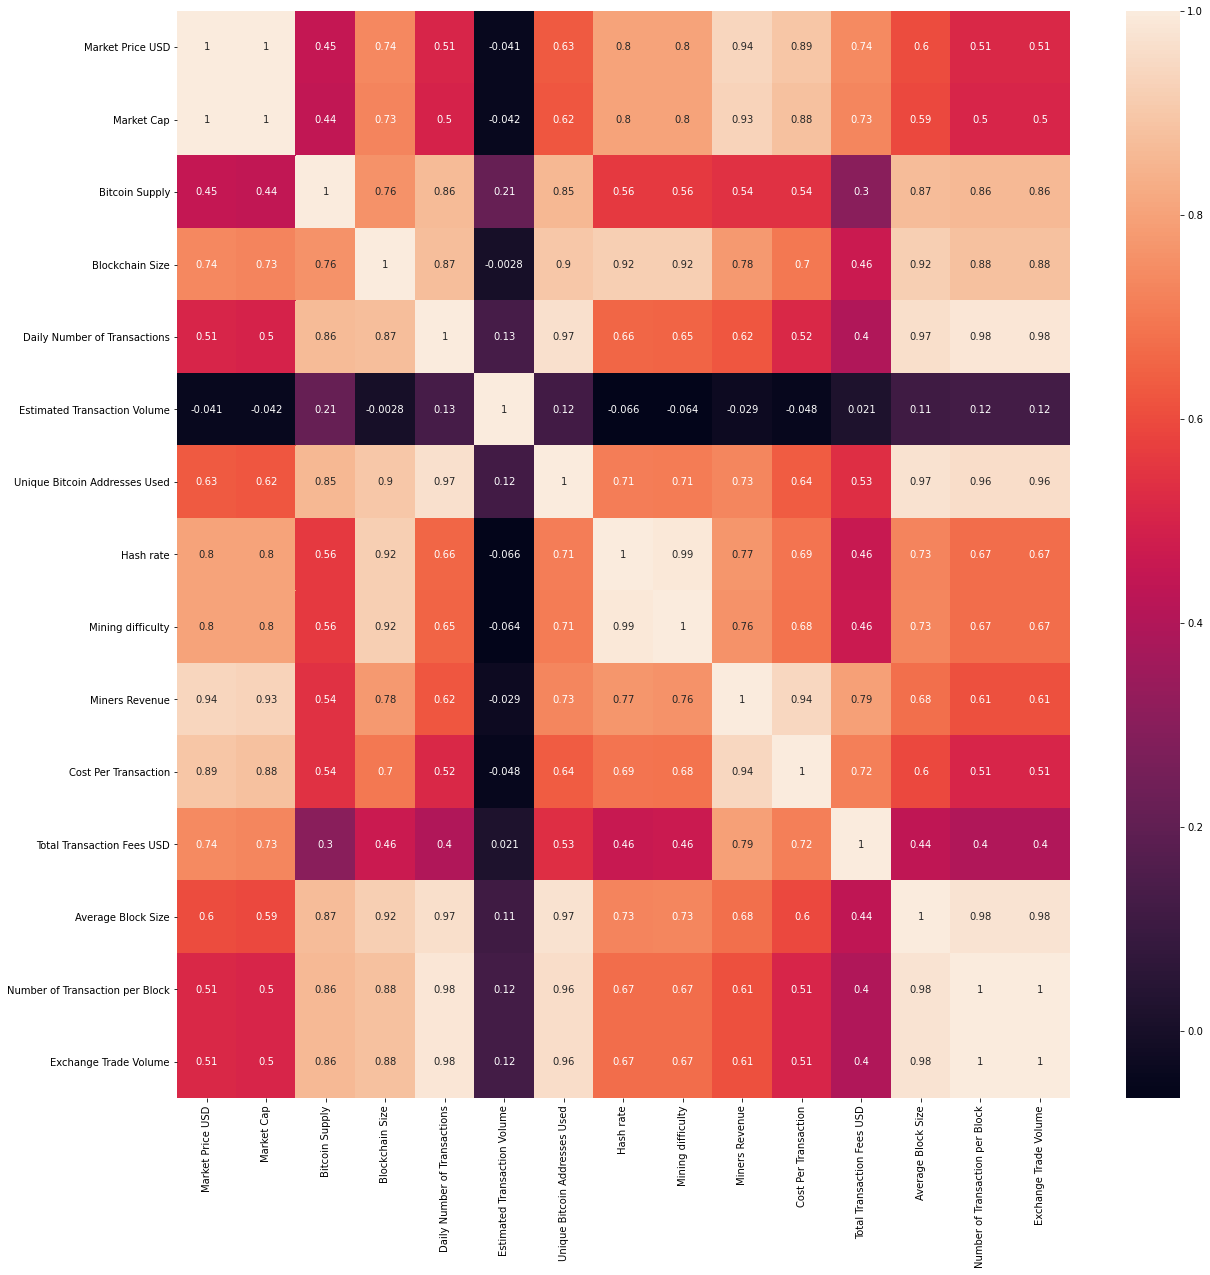

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = btc_data.corr()
plt.figure(figsize = (20,20))
sns.heatmap(corr, annot = True)